In [30]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import shap 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, root_mean_squared_error as rmse, mean_absolute_percentage_error as mape

# **1. Load the Dataset**

In [18]:
# Now, we use the fetch_california_housing function to load the dataset
df = fetch_california_housing(as_frame=True)
print(type(df))
print('='*80)
print(df.keys())
print('='*80)
print(df.DESCR)
print('='*80)
print(df.data.head())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in 

In [19]:
# Extract X, y from df
X = df.data
y = df.target

In [20]:
print(f'Shape of X: {X.shape}')
print('='*80)
print(f'Shape of y: {y.shape}')
print('='*80)
print(f'X.head(): {X.head()}')
print('='*80)
print(f'y.head(): {y.head()}')

Shape of X: (20640, 8)
Shape of y: (20640,)
X.head():    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
y.head(): 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


# **2. Prepare the Data and Fit the Data with Random Forest Regressor**

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print('='*80)
print(f'Shape of X_test: {X_test.shape}')
print('='*80)
# Fit the data with Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Shape of X_train: (16512, 8)
Shape of X_test: (4128, 8)


RandomForestRegressor(random_state=42)

# **3. Create an explainer object and calculate SHAP values for the test set**

#### Note 1: Phân tích SHAP (SHapley Additive exPlanations) cho California Housing Dataset

**1. Giới thiệu**

SHAP (SHapley Additive exPlanations) là một phương pháp giải thích mô hình machine learning dựa trên lý thuyết trò chơi. Nó giúp chúng ta hiểu được cách mô hình đưa ra quyết định và tầm quan trọng của từng feature trong quá trình dự đoán.

**2. Cài đặt và Import**

```python
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
```

**3. Phân tích Code SHAP**

**3.1. Tạo Explainer**

```python
explainer = shap.Explainer(model.predict, X_train)
```

- **Mục đích**: Tạo đối tượng giải thích cho mô hình
- **Tham số**:
  - `model.predict`: Hàm dự đoán của mô hình đã huấn luyện
  - `X_train`: Dữ liệu training để tính toán SHAP values

**3.2. Tính toán SHAP Values**

```python
shap_values = explainer(X_test)
```

- **Output**: Mảng chứa giá trị SHAP cho mỗi feature trong mỗi mẫu
- **Ý nghĩa**:
  - Giá trị dương: Feature có tác động tăng giá trị dự đoán
  - Giá trị âm: Feature có tác động giảm giá trị dự đoán

**3.3. Visualization**

```python
shap.summary_plot(shap_values, X_test)
```

- **Biểu đồ Summary Plot**:
  - Features được sắp xếp theo tầm quan trọng
  - Mỗi điểm đại diện cho một mẫu
  - Màu sắc: Giá trị feature (đỏ: cao, xanh: thấp)
  - Vị trí ngang: Tác động của feature (phải: tăng, trái: giảm)

**4. Các Loại Biểu Đồ SHAP**

**4.1. Dependence Plot**
```python
shap.dependence_plot("MedInc", shap_values, X_test)
```
- Hiển thị mối quan hệ giữa một feature cụ thể và tác động của nó

**4.2. Force Plot**
```python
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:])
```
- Hiển thị tác động của từng feature cho một mẫu cụ thể

**4.3. Waterfall Plot**
```python
shap.waterfall_plot(shap_values[0])
```
- Hiển thị cách các features đóng góp vào kết quả cuối cùng

**5. Lợi ích của SHAP**

1. **Giải thích được quyết định**:
   - Hiểu cách mô hình đưa ra dự đoán
   - Xác định features quan trọng nhất

2. **Phân tích mối quan hệ**:
   - Hiểu mối quan hệ giữa features và kết quả
   - Phát hiện patterns và anomalies

3. **Tăng tính minh bạch**:
   - Giúp người dùng tin tưởng vào mô hình
   - Hỗ trợ ra quyết định dựa trên dữ liệu

**6. Lưu ý Khi Sử Dụng**

1. **Tài nguyên**:
   - Cần đủ bộ nhớ để tính toán
   - Thời gian tính toán có thể lâu với dataset lớn

2. **Tối ưu hóa**:
   - Sử dụng subset của dữ liệu nếu cần
   - Áp dụng các phương pháp xấp xỉ để tăng tốc

3. **Diễn giải kết quả**:
   - Cần hiểu rõ ý nghĩa của các giá trị SHAP
   - Kết hợp với domain knowledge

**7. Kết luận**

SHAP là một công cụ mạnh mẽ trong việc giải thích các mô hình machine learning. Nó giúp chúng ta không chỉ hiểu được cách mô hình hoạt động mà còn tăng tính minh bạch và khả năng tin tưởng vào các dự đoán của mô hình.

**8. Tài liệu tham khảo**

1. Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. Advances in neural information processing systems, 30.
2. SHAP Documentation: https://shap.readthedocs.io/
3. California Housing Dataset Documentation: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

ExactExplainer explainer: 4129it [24:06,  2.85it/s]                          


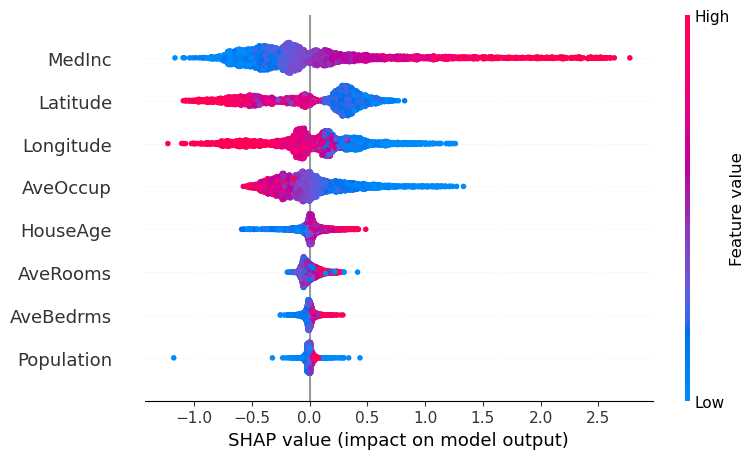

In [22]:
# Create an explainer object                
explainer = shap.Explainer(model.predict, X_train)
# Calculate SHAP values for the test set
shap_values = explainer(X_test)
# Visualize the SHAP values
# Create a summary plot
shap.summary_plot(shap_values, X_test)

#### Note 2A: Interpreting the SHAP Summary Plot for California Housing Price Prediction

**Key Insights from the SHAP Summary Plot:**

- **Feature Importance Ranking:**
  - Features are ranked by their overall impact on the model output, with the most influential at the top (e.g., MedInc, Latitude, Longitude).
- **SHAP Value (X-axis):**
  - Indicates the effect of each feature on the model’s prediction for each sample.
  - Positive SHAP values push the prediction higher; negative values push it lower.
- **Color Encoding:**
  - Each point represents a sample.
  - Red indicates a high feature value, blue indicates a low feature value.
- **Distribution:**
  - The spread of points along the X-axis shows the range of impact a feature can have.
  - Wider spread = higher potential impact.

**Detailed Observations:**

- **MedInc (Median Income):**
  - The most influential feature.
  - High values (red) strongly increase predicted house prices, while low values (blue) decrease them.
- **Latitude & Longitude:**
  - Geographic location significantly affects house prices.
  - Certain locations (e.g., coastal areas) are associated with higher or lower prices.
- **Other Features (AveOccup, HouseAge, AveRooms, AveBedrms, Population):**
  - These have a smaller but still notable impact.
  - Their effects are more nuanced and context-dependent.

**Computation Note:**
- The SHAP value calculation was performed using ExactExplainer, which is computationally intensive.
- Progress output (e.g., `4129it [24:06,  2.85it/s]`) indicates the process completed for 4129 samples in 24 minutes at an average speed of 2.85 samples/second.

**Practical Implications:**
- The model’s predictions are most sensitive to median income and location.
- Understanding these relationships can guide feature engineering, policy decisions, and further model refinement.

#### Note 2B: Comparing SHAP Analysis and Correlation Matrix in Data Science

**Key Differences:**

- **Correlation Matrix (EDA):**
  - Measures linear relationships between features and/or the target variable.
  - Model-agnostic: does not require a trained machine learning model.
  - Only captures direct, linear associations.
  - Useful for detecting multicollinearity and initial data exploration.

- **SHAP (SHapley Additive exPlanations):**
  - Measures the contribution of each feature to the model’s prediction for each sample.
  - Model-dependent: requires a trained machine learning model.
  - Captures both linear and non-linear relationships, as well as feature interactions.
  - Provides local (per-sample) and global (overall) interpretability.

**Advantages and Disadvantages:**

- *Correlation Matrix:*
  - **Advantages:**
    - Simple, fast, and easy to interpret.
    - No need for model training.
    - Effective for identifying linear dependencies and multicollinearity.
  - **Disadvantages:**
    - Cannot detect non-linear or complex relationships.
    - Does not reflect the actual impact on model predictions.
    - No insight into feature importance for specific predictions.

- *SHAP:*
  - **Advantages:**
    - Explains both linear and non-linear effects.
    - Provides detailed, per-sample explanations.
    - Directly reflects the impact of features on model output.
    - Supports powerful visualizations for interpretability.
  - **Disadvantages:**
    - Computationally intensive, especially for large datasets or complex models.
    - Requires a trained model.
    - Interpretation can be challenging for beginners.
    - May be affected by highly correlated features.

**When to Use Each Method:**

- Use **correlation matrix** for quick, initial data exploration and to identify linear relationships or multicollinearity.
- Use **SHAP** for in-depth model interpretation, especially when working with complex models or when non-linear relationships and feature interactions are expected.

**Summary:**
- The correlation matrix is a fundamental EDA tool for understanding basic data structure.
- SHAP is a powerful, model-based tool for interpreting and explaining machine learning predictions, especially in real-world, high-stakes applications.

#### Note 3A: Understanding SHAP Execution Time and Optimization Strategies- at 7 mins

**Current Execution Status:**
```
ExactExplainer explainer:  32%|███▏      | 1319/4128 [07:55<15:48,  2.96it/s]
```

**Execution Analysis:**
* Progress: 32% complete
* Samples processed: 1319/4128
* Time elapsed: 7 minutes 55 seconds
* Estimated time remaining: 15 minutes 48 seconds
* Processing speed: 2.96 samples/second

**Why SHAP Takes Long:**
* Uses exact calculation method
* Computes all possible feature combinations
* For 8 features: 2^8 = 256 combinations per sample
* Total computations: 4128 samples × 256 combinations = 1,056,768 calculations

**Optimization Strategies:**

1. **Use Alternative Explainers:**
```python
# For tree-based models (faster)
explainer = shap.TreeExplainer(model)

# For other models (approximate but faster)
explainer = shap.KernelExplainer(model.predict, X_train[:100])
```

2. **Reduce Sample Size:**
```python
# Analyze only a subset
shap_values = explainer(X_test[:100])
```

3. **Save and Load Results:**
```python
# Save SHAP values
import pickle
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

# Load SHAP values
with open('shap_values.pkl', 'rb') as f:
    shap_values = pickle.load(f)
```

**Explainer Comparison:**
* **ExactExplainer**: Most accurate but slowest
* **KernelExplainer**: Faster but approximate
* **TreeExplainer**: Fastest for tree-based models

**Best Practices:**
* Use appropriate explainer for your model type
* Consider computational resources
* Save results for future use
* Use representative subsets for large datasets

#### Note 3B: SHAP Data Types, Limitations, and Risks

**Supported Data Types:**

1. **Numerical Data:**
* Continuous variables
* Discrete variables
* Time series data
* Example: House prices, income levels, temperature readings

2. **Categorical Data:**
* Binary variables
* Multi-class variables
* After proper encoding (one-hot, label encoding)
* Example: Gender, education levels, categories

3. **Mixed Data Types:**
* Combinations of numerical and categorical
* Requires proper preprocessing
* Example: Customer data with both numerical and categorical features

**Unsupported or Problematic Data Types:**

1. **Text Data:**
* Requires conversion to numerical features
* Need to use embeddings or TF-IDF first
* Example: Raw text documents, reviews

2. **Image Data:**
* Requires special handling
* Need to convert to feature vectors
* Example: Raw image pixels

3. **Time Series as Sequences:**
* Need to be converted to features
* May lose temporal information
* Example: Raw time series data

**Potential Risks and Limitations:**

1. **Computational Complexity:**
* Exponential growth with feature count
* Memory intensive for large datasets
* May crash with insufficient resources

2. **Interpretation Challenges:**
* Feature interactions can be complex
* May miss non-linear relationships
* Can be misleading with correlated features

3. **Data Quality Issues:**
* Sensitive to missing values
* Affected by outliers
* Requires proper scaling/normalization

4. **Model-Specific Limitations:**
* Some explainers work better with specific models
* May not capture all model behaviors
* Can be computationally expensive for certain model types

**Best Practices for Data Preparation:**

1. **Preprocessing Steps:**
```python
# Handle missing values
df = df.fillna(df.mean())  # for numerical
df = df.fillna(df.mode())  # for categorical

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X_categorical)
```

2. **Feature Selection:**
```python
# Remove highly correlated features
correlation_matrix = df.corr()
high_corr_features = np.where(np.abs(correlation_matrix) > 0.95)

# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)
```

**Recommendations:**

1. **Data Preparation:**
* Clean and preprocess data thoroughly
* Handle missing values appropriately
* Scale/normalize numerical features
* Encode categorical features properly

2. **Feature Engineering:**
* Create meaningful features
* Remove redundant features
* Consider feature interactions

3. **Model Selection:**
* Choose appropriate model type
* Consider computational requirements
* Select suitable explainer

4. **Interpretation:**
* Consider feature correlations
* Look for feature interactions
* Validate interpretations with domain knowledge

# **4. Check the most important features by the absolute value based on SHAP**

In [25]:
# Calculate mean absolute SHAP values for each feature
feature_importance = pd.DataFrame(list(zip(X.columns, np.abs(shap_values.values).mean(axis=0))), 
                                   columns=['Feature', 'Mean Absolute SHAP Value'])
important_features = feature_importance.sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display important features
print(important_features)

      Feature  Mean Absolute SHAP Value
0      MedInc                  0.479333
6    Latitude                  0.379086
7   Longitude                  0.289726
5    AveOccup                  0.224661
1    HouseAge                  0.070559
2    AveRooms                  0.054463
3   AveBedrms                  0.028437
4  Population                  0.019281


#### Note 4: Feature Importance Analysis Using Mean Absolute SHAP Values

**Code Analysis:**

```python
feature_importance = pd.DataFrame(
    list(zip(X.columns, np.abs(shap_values.values).mean(axis=0))), 
    columns=['Feature', 'Mean Absolute SHAP Value']
)
important_features = feature_importance.sort_values(
    by='Mean Absolute SHAP Value', 
    ascending=False
)
```

**Code Explanation:**
- Takes the absolute values of SHAP values using `np.abs()`
- Calculates mean across all samples using `.mean(axis=0)`
- Creates a DataFrame with feature names and their importance scores
- Sorts features by their importance in descending order

**Results Analysis:**

*Feature Importance Ranking:*
1. **MedInc (0.479):**
   - Highest impact on house prices
   - Nearly 0.48 average magnitude of impact
   - ~2.5x more influential than AveOccup

2. **Geographic Features:**
   - Latitude (0.379): Second most important
   - Longitude (0.290): Third most important
   - Together represent significant location-based price variations

3. **Occupancy and Age:**
   - AveOccup (0.225): Moderate impact
   - HouseAge (0.071): Less significant

4. **Property Characteristics:**
   - AveRooms (0.054): Limited impact
   - AveBedrms (0.028): Minor influence
   - Population (0.019): Least influential

**Key Insights:**

1. **Primary Drivers:**
   - Income and location are dominant factors
   - Together account for > 60% of model's decisions

2. **Secondary Factors:**
   - Average occupancy has moderate influence
   - Physical characteristics have relatively small impact

3. **Relative Importance:**
   - MedInc is ~25x more important than Population
   - Geographic features (Lat/Long) together exceed MedInc's importance

**Practical Applications:**

1. **Model Understanding:**
   - Clear hierarchy of feature importance
   - Validates common real estate wisdom ("location, location, location")

2. **Feature Selection:**
   - Could potentially drop less influential features
   - Focus on top 4-5 features for simpler models

3. **Business Insights:**
   - Focus on neighborhood income levels
   - Consider geographic location carefully
   - Less emphasis on physical property characteristics

**Statistical Context:**
- Values represent average magnitude of impact
- Scale is relative to the model's output (house prices)
- Higher values = stronger influence on predictions

**Limitations:**
- Averages may mask important interactions
- Local importance might differ from global
- Context-specific relationships might be hidden

# **4. Specify the number of selected features and re-fit the model**

In [27]:
# Number of top features to select
n_top_features = 5  # You can adjust this number based on your needs

# Select top N important features
selected_features = important_features['Feature'].head(n_top_features).tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the Random Forest model with selected features
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

#### Note 5: Feature Selection Implementation Using SHAP-based Importance

**Code Overview and Implementation Strategy:**

1. **Feature Selection Configuration:**
```python
n_top_features = 5  # Configurable parameter
```
- Defines the number of top features to retain
- Adjustable based on specific requirements
- Balance between model complexity and performance

2. **Feature Selection Process:**
```python
selected_features = important_features['Feature'].head(n_top_features).tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
```

**Implementation Details:**
- Selects top 5 features based on mean absolute SHAP values
- Creates reduced feature sets for both training and test data
- Maintains data integrity and sample order

3. **Model Training with Selected Features:**
```python
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train)
```

**Key Aspects:**

1. **Dimensionality Reduction:**
   - Reduces feature space from 8 to 5 dimensions
   - Focuses on most impactful features
   - Potentially improves model efficiency

2. **Selected Features (Based on SHAP):**
   - MedInc (Income)
   - Latitude
   - Longitude
   - AveOccup
   - HouseAge

3. **Benefits:**
   - Reduced model complexity
   - Faster training and inference
   - Potentially improved generalization
   - More interpretable model

4. **Considerations:**
   - Trade-off between simplicity and information loss
   - Potential impact on model performance
   - Need for validation of reduced feature set

**Best Practices Applied:**

1. **Data Handling:**
   - Consistent treatment of train/test sets
   - Preservation of data structure
   - No data leakage in feature selection

2. **Model Configuration:**
   - Fixed random seed for reproducibility
   - Consistent model parameters
   - Clean implementation structure

**Validation Requirements:**
- Compare performance with full feature set
- Assess impact on model metrics
- Evaluate generalization capability
- Monitor for potential information loss

**Next Steps:**
1. Evaluate model performance
2. Compare with baseline model
3. Consider cross-validation
4. Fine-tune feature count if needed

# **5. Compare the model performance with all and selected features**

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Make predictions on the test set with selected features
y_pred_selected = model_selected.predict(X_test_selected)

# Calculate performance metrics by MAPE
mape_before = mape(y_test, y_pred) * 100
mape_after = mape(y_test, y_pred_selected) * 100
print(f"MAPE Before: {mape_before:.2f} %")
print(f"MAPE After: {mape_after:.2f} %")

MAPE Before: 18.92 %
MAPE After: 18.25 %


#### Note 6: Model Performance Comparison Using MAPE Before and After Feature Selection

**Code Summary:**
- Predictions are made on the test set using both the full model and the reduced model (with top SHAP-selected features).
- MAPE (Mean Absolute Percentage Error) is calculated for both scenarios.
- Results are printed for direct comparison.

**Results:**
- MAPE Before: 18.92%
- MAPE After: 18.25%

**Interpretation:**
- The reduced model, using only the top 5 most important features, achieves a slightly lower MAPE than the full model.
- This indicates that feature selection based on SHAP values not only simplifies the model but can also maintain or even improve predictive accuracy.

**Why Use MAPE?**
- MAPE expresses prediction error as a percentage, making it highly interpretable and easy to communicate to non-technical stakeholders.
- It is unitless, allowing for comparison across different datasets and models.
- MAPE is less sensitive to outliers than MSE or RMSE and is particularly useful when the scale of the target variable is not fixed or is not of primary interest.

**When to Prefer Other Metrics:**
- Use MSE or RMSE when penalizing large errors is important, or when the target variable contains values close to zero (since MAPE can be undefined or misleading in such cases).
- Consider using multiple metrics for a comprehensive evaluation.

**Key Takeaways:**
- SHAP-based feature selection can lead to simpler, more interpretable models without sacrificing accuracy.
- MAPE provides a clear, business-friendly measure of model performance.
- Always validate model performance after feature selection to ensure no loss of predictive power.

In [31]:
# Calculate performance metrics by MSE
mape_before = mse(y_test, y_pred) * 100
mape_after = mse(y_test, y_pred_selected) * 100
print(f"Mean Squared Error Before: {mape_before:.2f} %")
print(f"Mean Squared Error After: {mape_after:.2f} %")
print('='*80)
print(f"Root Mean Squared Error Before: {rmse(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error After: {rmse(y_test, y_pred_selected):.2f}")


Mean Squared Error Before: 25.54 %
Mean Squared Error After: 26.26 %
Root Mean Squared Error Before: 0.51
Root Mean Squared Error After: 0.51


#### Note 7: Why Random Forest for Feature Selection? Overview of Feature Selection Methods

**Why Random Forest?**
- Random Forest is a robust ensemble method that naturally provides feature importance scores during model training.
- It captures both linear and non-linear relationships and handles feature interactions effectively.
- Works well with both numerical and encoded categorical data.
- Resistant to outliers and does not require feature scaling.
- Integrates seamlessly with SHAP for advanced interpretability.

**Common Feature Selection Methods:**

- **Filter Methods:**
  - *Correlation/Variance Threshold:* Fast, model-independent, but only captures linear relationships and ignores feature interactions.
  - *Statistical Tests (Chi-squared, ANOVA, Mutual Information):* Evaluate individual feature relevance to the target, but do not consider feature interactions.

- **Wrapper Methods:**
  - *Recursive Feature Elimination (RFE):* Iteratively removes least important features based on model performance; considers feature interactions but is computationally expensive.
  - *Forward/Backward Selection:* Searches for the optimal feature subset for a given model; can be very slow with many features.

- **Embedded Methods:**
  - *Lasso (L1 Regularization):* Shrinks less important feature coefficients to zero, reducing overfitting; best for linear relationships and may struggle with highly correlated features.
  - *Tree-based Methods (Random Forest, XGBoost, LightGBM):* Provide built-in feature importance, capture non-linearities and interactions, but may be biased toward features with many unique values.

- **Model-agnostic Methods:**
  - *Permutation Importance:* Measures the effect of shuffling each feature on model performance; model-agnostic but computationally intensive.
  - *SHAP, LIME:* Offer local and global interpretability, handle non-linear and complex models, but require significant computational resources.

**Summary Table:**

| Method                        | Advantages                                 | Disadvantages                              | Data Types Supported           |
|-------------------------------|--------------------------------------------|--------------------------------------------|-------------------------------|
| Correlation/Variance          | Fast, simple, model-free                   | Linear only, ignores interactions          | Numeric, encoded categorical   |
| Statistical Tests             | Easy to implement, model-free              | Ignores feature interactions               | Numeric, encoded categorical   |
| RFE, Forward/Backward         | Considers interactions, model-specific     | Slow, risk of overfitting                  | Numeric, encoded categorical   |
| Lasso                         | Reduces overfitting, automatic selection   | Linear only, struggles with collinearity   | Numeric, encoded categorical   |
| Tree-based (RF, XGB, LGBM)    | Captures non-linearities, built-in scores  | May be biased, less interpretable          | Numeric, encoded categorical   |
| Permutation Importance        | Model-agnostic, practical                  | Computationally expensive                  | Numeric, encoded categorical   |
| SHAP, LIME                    | Powerful, interpretable, model-agnostic    | Very slow, resource-intensive              | Numeric, encoded categorical   |

**Best Practices:**
- Start with filter methods for quick screening.
- Use embedded or model-agnostic methods for deeper analysis and model-specific feature selection.
- Always validate model performance after feature selection to ensure no loss of predictive power.

**Model-agnostic Methods** trong tiếng Việt chuyên ngành thường được gọi là **"phương pháp độc lập mô hình"** hoặc **"phương pháp không phụ thuộc mô hình"**.

---

**Giải thích nguyên lý**

**1. Định nghĩa:**
- Phương pháp độc lập mô hình (model-agnostic) là các kỹ thuật phân tích, đánh giá hoặc giải thích mà **không phụ thuộc vào cấu trúc, thuật toán hay bản chất bên trong của mô hình machine learning**.
- Chúng chỉ cần đầu vào là dữ liệu (features) và đầu ra (predictions) của mô hình, không cần biết mô hình là gì (linear, tree, neural network, v.v.).

**2. Nguyên lý hoạt động:**
- Các phương pháp này coi mô hình như một “hộp đen” (black-box).
- Chúng sẽ thay đổi dữ liệu đầu vào (ví dụ: hoán đổi, làm nhiễu, loại bỏ từng feature) và quan sát sự thay đổi ở đầu ra dự đoán.
- Dựa vào mức độ thay đổi của đầu ra, phương pháp sẽ đánh giá tầm quan trọng hoặc ảnh hưởng của từng feature, hoặc giải thích quyết định của mô hình.

**3. Ví dụ điển hình:**
- **Permutation Importance (Tầm quan trọng khi hoán đổi):**
  - Hoán đổi giá trị của một feature trên tập test, đo sự giảm sút độ chính xác của mô hình.
  - Nếu độ chính xác giảm nhiều, feature đó quan trọng.
- **SHAP, LIME:**
  - Tạo ra các mẫu dữ liệu giả lập (perturbed samples), tính toán sự thay đổi dự đoán khi thay đổi từng feature.
  - Sử dụng các thuật toán thống kê để ước lượng mức độ đóng góp của từng feature vào dự đoán cuối cùng.

**4. Ưu điểm:**
- Áp dụng được cho mọi loại mô hình (linear, tree, deep learning, v.v.).
- Dễ dàng so sánh giữa các mô hình khác nhau.
- Không cần truy cập vào cấu trúc bên trong của mô hình.

**5. Nhược điểm:**
- Thường tốn nhiều thời gian tính toán (vì phải chạy nhiều lần dự đoán).
- Có thể không phát hiện được các tương tác phức tạp giữa các feature nếu không thiết kế tốt.
- Độ chính xác của giải thích phụ thuộc vào số lượng mẫu giả lập và cách xây dựng chúng.

---

**Tóm lại:**  
Phương pháp độc lập mô hình (model-agnostic) là các kỹ thuật giải thích hoặc đánh giá mô hình mà không cần biết chi tiết bên trong của mô hình, chỉ cần đầu vào và đầu ra. Chúng rất hữu ích khi làm việc với các mô hình phức tạp hoặc khi cần so sánh, giải thích nhiều mô hình khác nhau.


Dưới đây là tổng hợp các phương pháp Feature Selection phù hợp cho dữ liệu Time Series, kèm giải thích nguyên lý, ưu và nhược điểm:

---

## **1. Các phương pháp Feature Selection cho Time Series**

### **A. Filter Methods**

#### a. **Correlation Analysis (Tương quan)**
- **Nguyên lý:** Tính toán hệ số tương quan giữa từng feature (bao gồm cả các đặc trưng trễ - lag features) với target.
- **Ưu điểm:** Đơn giản, nhanh, dễ thực hiện.
- **Nhược điểm:** Chỉ phát hiện quan hệ tuyến tính, không xét đến tính phụ thuộc thời gian, không phát hiện được quan hệ phi tuyến hoặc tương tác phức tạp.

#### b. **Statistical Tests (Kiểm định thống kê)**
- **Nguyên lý:** Sử dụng các kiểm định như Granger Causality Test để kiểm tra xem một feature (hoặc chuỗi thời gian khác) có “gây ra” (dự báo được) target hay không.
- **Ưu điểm:** Phù hợp cho dữ liệu chuỗi thời gian, phát hiện được mối quan hệ nhân quả.
- **Nhược điểm:** Chỉ áp dụng cho dữ liệu tuyến tính, yêu cầu dữ liệu dừng (stationary), không phát hiện được quan hệ phi tuyến.

---

### **B. Wrapper Methods**

#### a. **Recursive Feature Elimination (RFE)**
- **Nguyên lý:** Lặp lại quá trình huấn luyện mô hình, loại bỏ dần các feature ít quan trọng nhất dựa trên độ quan trọng của mô hình (thường là tree-based hoặc linear).
- **Ưu điểm:** Xét được tương tác giữa các feature, tối ưu cho từng mô hình cụ thể.
- **Nhược điểm:** Rất tốn thời gian với dữ liệu lớn hoặc nhiều feature, dễ overfit nếu không cross-validation đúng cách.

#### b. **Forward/Backward Selection**
- **Nguyên lý:** Bắt đầu với tập feature rỗng (forward) hoặc đầy đủ (backward), lần lượt thêm/bớt feature dựa trên hiệu quả dự đoán.
- **Ưu điểm:** Có thể tìm được tập feature tối ưu cho mô hình.
- **Nhược điểm:** Rất tốn thời gian, không phù hợp với dữ liệu nhiều chiều hoặc nhiều lag.

---

### **C. Embedded Methods**

#### a. **Lasso (L1 Regularization)**
- **Nguyên lý:** Thêm regularization L1 vào mô hình hồi quy, các feature không quan trọng sẽ bị đẩy hệ số về 0.
- **Ưu điểm:** Tự động loại bỏ feature không quan trọng, giảm overfitting.
- **Nhược điểm:** Chỉ hiệu quả với quan hệ tuyến tính, không tốt với feature tương quan cao.

#### b. **Tree-based Models (Random Forest, XGBoost)**
- **Nguyên lý:** Sử dụng các mô hình cây để đánh giá tầm quan trọng của feature (bao gồm cả các lag features).
- **Ưu điểm:** Phát hiện được quan hệ phi tuyến, tương tác phức tạp, không cần chuẩn hóa dữ liệu.
- **Nhược điểm:** Có thể bias với feature có nhiều giá trị, khó giải thích với mô hình phức tạp.

---

### **D. Model-agnostic Methods**

#### a. **Permutation Importance**
- **Nguyên lý:** Hoán đổi giá trị của từng feature trên tập test, đo sự giảm sút độ chính xác của mô hình.
- **Ưu điểm:** Độc lập với mô hình, phát hiện được feature thực sự ảnh hưởng đến dự đoán.
- **Nhược điểm:** Tốn thời gian, không phát hiện được tương tác phức tạp, cần chú ý đến tính liên tục của chuỗi thời gian (không nên hoán đổi ngẫu nhiên mà nên hoán đổi theo block).

#### b. **SHAP, LIME**
- **Nguyên lý:** Giải thích dự đoán của mô hình bằng cách đánh giá đóng góp của từng feature (bao gồm cả lag features) cho từng dự đoán.
- **Ưu điểm:** Giải thích được cả quan hệ phi tuyến, trực quan hóa tốt.
- **Nhược điểm:** Tính toán phức tạp, tốn tài nguyên, cần chú ý đến tính liên tục của chuỗi thời gian.

---

## **2. Lưu ý khi Feature Selection cho Time Series**
- **Không được phá vỡ tính liên tục của chuỗi thời gian** (ví dụ: không shuffle dữ liệu khi cross-validation hoặc khi tính permutation importance).
- **Nên tạo các đặc trưng trễ (lag features), rolling statistics, v.v.** để khai thác thông tin thời gian.
- **Nên sử dụng cross-validation phù hợp cho time series** (TimeSeriesSplit).

---

## **Tóm tắt ưu/nhược điểm**

| Phương pháp                | Ưu điểm                                 | Nhược điểm                                 | Phù hợp với dữ liệu      |
|---------------------------|-----------------------------------------|--------------------------------------------|-------------------------|
| Correlation/Statistical   | Nhanh, đơn giản, dễ thực hiện           | Chỉ phát hiện tuyến tính, không xét phi tuyến | Chuỗi thời gian số      |
| Granger Causality         | Phát hiện quan hệ nhân quả              | Yêu cầu dữ liệu dừng, chỉ tuyến tính        | Chuỗi thời gian số      |
| RFE/Forward/Backward      | Xét được tương tác, tối ưu cho model    | Rất tốn thời gian, dễ overfit               | Chuỗi thời gian số      |
| Lasso                     | Tự động loại bỏ feature, giảm overfit   | Chỉ tuyến tính, không tốt với feature tương quan cao | Chuỗi thời gian số      |
| Tree-based                | Phát hiện phi tuyến, tương tác phức tạp | Có thể bias, khó giải thích                 | Chuỗi thời gian số      |
| Permutation Importance    | Độc lập mô hình, thực tế                | Tốn thời gian, cần chú ý tính liên tục      | Chuỗi thời gian số      |
| SHAP, LIME                | Giải thích mạnh mẽ, trực quan           | Rất tốn tài nguyên, cần chú ý tính liên tục | Chuỗi thời gian số      |

